# Comprehensive Tutorial on Linear and Polynomial Regression

## 1. Introduction: Solving Linear Equations with the Matrix Inverse Method

At the heart of linear regression is the fundamental task of solving a system of linear equations. A system of linear equations can be represented in the matrix form **AX = B**, where **A** is a matrix of coefficients, **X** is a vector of unknown variables, and **B** is a vector of constants.

If **A** is a square and invertible matrix, we can find a unique solution for **X** by pre-multiplying both sides of the equation by the inverse of **A** (**A⁻¹**):

**A⁻¹AX = A⁻¹B**

Since **A⁻¹A** is the identity matrix (**I**), we get:

**IX = A⁻¹B**

**X = A⁻¹B**

In [5]:
import numpy as np

# Define matrix A and vector B
A = np.array([[2, 1],
              [1, 3]])
B = np.array([8, 11])

# Calculate the inverse of A
A_inv = np.linalg.inv(A)

# Solve for X
X = np.dot(A_inv, B)

print(f"The solution is: {X}")

The solution is: [2.6 2.8]


## 2. The Best Fit Line: Moore-Penrose Pseudoinverse for Non-Invertible Matrices

In real-world datasets, the matrix **A** (our feature matrix) is often not square. It's typically a "tall" matrix, meaning it has more rows (observations) than columns (features). In such cases, the matrix is not invertible, and a unique solution to **AX = B** might not exist. This is where the concept of a "best fit" line comes in.

We aim to find a solution that minimizes the error between our predictions (**AX**) and the actual values (**B**). This is achieved using the **Moore-Penrose Pseudoinverse** (often denoted as **A⁺**). The solution for the best fit line is given by:

**X = A⁺B**

This method, also known as the Normal Equation, provides a closed-form solution to the linear regression problem. While it gives an exact solution, it can be computationally expensive. The calculation of the pseudoinverse often involves matrix multiplication and inversion, which has a time complexity of approximately **O(n³)**, where 'n' is the number of features. For datasets with a large number of features, this becomes a significant bottleneck. [2, 7, 10]

In [11]:
# Example with a tall matrix
A = np.array([[1, 1],
              [1, 2],
              [1, 3]])
B = np.array([2, 2.5, 3.5])

# Calculate the pseudoinverse of A
A_pseudo_inv = np.linalg.pinv(A)

# Solve for X
X = np.dot(A_pseudo_inv, B)

print(f"The coefficients for the best fit line are: {X}")

The coefficients for the best fit line are: [1.16666667 0.75      ]


## 3. The Motivation for Gradient Descent

Given the computational cost of the closed-form solution, we often turn to an iterative optimization algorithm called **Gradient Descent**. Instead of calculating the solution in a single step, Gradient Descent starts with random values for the coefficients and iteratively adjusts them to minimize a cost function (typically the Mean Squared Error in linear regression). [2, 16]

The core idea is to take steps in the direction of the negative gradient of the cost function. The size of these steps is controlled by a parameter called the **learning rate**.

### Interactive Visualization of Gradient Descent

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance

learning_rate = 0.1
n_iterations = 100

theta = np.random.randn(2,1)

fig, ax = plt.subplots()
ax.scatter(X, y)
line, = ax.plot(X, X_b.dot(theta), "r-")

def animate(i):
    global theta
    gradients = 2/100 * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - learning_rate * gradients
    line.set_ydata(X_b.dot(theta))
    return line,

animation = FuncAnimation(fig, animate, frames=n_iterations, blit=True)
plt.close()
HTML(animation.to_jshtml())

## 4. Linear Regression with `statsmodels` and `sklearn`

Now, let's move from the theoretical underpinnings to practical implementation using popular Python libraries.

### 4.1. `statsmodels`

`statsmodels` is a powerful library for statistical modeling in Python. It provides detailed statistical summaries of the models. [8, 9]

In [32]:
import statsmodels.api as sm
from sklearn.datasets import fetch_california_housing

In [36]:
housing = fetch_california_housing()
print(housing)

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]]), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n-

In [40]:
X = housing.data
print(X)

[[   8.3252       41.            6.98412698 ...    2.55555556
    37.88       -122.23      ]
 [   8.3014       21.            6.23813708 ...    2.10984183
    37.86       -122.22      ]
 [   7.2574       52.            8.28813559 ...    2.80225989
    37.85       -122.24      ]
 ...
 [   1.7          17.            5.20554273 ...    2.3256351
    39.43       -121.22      ]
 [   1.8672       18.            5.32951289 ...    2.12320917
    39.43       -121.32      ]
 [   2.3886       16.            5.25471698 ...    2.61698113
    39.37       -121.24      ]]


In [46]:
y = housing.target
print(y)

[4.526 3.585 3.521 ... 0.923 0.847 0.894]


In [48]:
# statsmodels requires the addition of a constant to the feature matrix
X_with_const = sm.add_constant(X)

model = sm.OLS(y, X_with_const)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     3970.
Date:                Fri, 29 Aug 2025   Prob (F-statistic):               0.00
Time:                        13:49:36   Log-Likelihood:                -22624.
No. Observations:               20640   AIC:                         4.527e+04
Df Residuals:                   20631   BIC:                         4.534e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -36.9419      0.659    -56.067      0.0

### 4.2. `scikit-learn`

`scikit-learn` is the go-to library for machine learning in Python. It offers a simple and consistent API for a wide range of models. [1, 3, 4, 5, 6]

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

print(f"Intercept: {lin_reg.intercept_}")
print(f"Coefficients: {lin_reg.coef_}")

y_pred = lin_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Intercept: -37.02327770606376
Coefficients: [ 4.48674910e-01  9.72425752e-03 -1.23323343e-01  7.83144907e-01
 -2.02962058e-06 -3.52631849e-03 -4.19792487e-01 -4.33708065e-01]
Mean Squared Error: 0.5558915986952419


## 5. Polynomial Regression: When Linear is Not Enough

Sometimes, the relationship between features and the target variable is not linear. In such cases, linear regression can give suboptimal results. Polynomial regression can capture these non-linear relationships by adding polynomial features (e.g., x², x³, etc.) to the model. [13, 19, 22, 23]

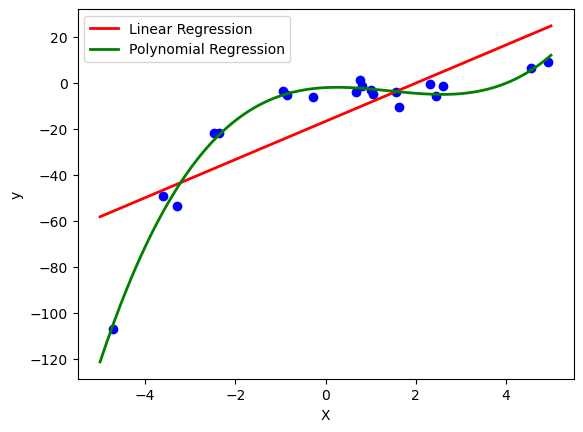

In [56]:
import numpy as np
import matplotlib.pyplot as plt

# Generate some non-linear data
np.random.seed(0)
X = 2 - 3 * np.random.normal(0, 1, 20)
y = X - 2 * (X ** 2) + 0.5 * (X ** 3) + np.random.normal(-3, 3, 20)

# Reshape for sklearn
X = X[:, np.newaxis]

# Linear Regression
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

# Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly_features.fit_transform(X)

poly_reg = LinearRegression()
poly_reg.fit(X_poly, y)

# Plot the results
X_new = np.linspace(-5, 5, 200).reshape(200, 1)
X_new_poly = poly_features.transform(X_new)
y_new_poly = poly_reg.predict(X_new_poly)
y_new_lin = lin_reg.predict(X_new)

plt.scatter(X, y, color='blue')
plt.plot(X_new, y_new_lin, color='red', linewidth=2, label='Linear Regression')
plt.plot(X_new, y_new_poly, color='green', linewidth=2, label='Polynomial Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

## 6. Exercises

### Exercise 1: Implement Linear Regression from Scratch


### Define a class for our Linear Regression model
CLASS ScratchLinearRegression:

    # The constructor initializes the learning rate and number of iterations.
    # It also prepares variables for weights and bias.
    INITIALIZE(learning_rate, n_iterations):
        SET self.learning_rate = learning_rate
        SET self.n_iterations = n_iterations
        SET self.weights = None
        SET self.bias = None

    # The fit method trains the model.
    METHOD fit(X, y):
        # Get the number of samples (rows) and features (columns) from the input data X.
        n_samples, n_features = GET_SHAPE(X)

        # Initialize weights as a vector of zeros with a size equal to the number of features.
        self.weights = CREATE_ZERO_VECTOR(n_features)
        # Initialize bias to 0.
        self.bias = 0

        # --- Gradient Descent Loop ---
        # Loop for the specified number of iterations.
        FOR i FROM 0 TO self.n_iterations:
            # 1. Calculate the current predictions using the formula: y_pred = X * weights + bias
            y_predicted = DOT_PRODUCT(X, self.weights) + self.bias

            # 2. Calculate the gradients (partial derivatives) of the cost function (MSE)
            #    with respect to weights (dw) and bias (db).
            #    Gradient for weights (dw) = (1/n_samples) * SUM((y_pred - y) * X)
            #    Gradient for bias (db) = (1/n_samples) * SUM(y_pred - y)
            dw = (1 / n_samples) * DOT_PRODUCT(TRANSPOSE(X), (y_predicted - y))
            db = (1 / n_samples) * SUM(y_predicted - y)

            # 3. Update the weights and bias by taking a step in the opposite direction of the gradient.
            #    The step size is controlled by the learning rate.
            self.weights = self.weights - self.learning_rate * dw
            self.bias = self.bias - self.learning_rate * db

    # The predict method uses the trained weights and bias to make :
        # Calculate and return the predictions for new data lues.ll your model's predictions match the actual values.

How to use the class
1. Create an instance of the ScratchLinearRegression model.
2. Call the fit() method with your training data (X_train, y_train).
3. Call the predict() method with your test data (X_test).
4. (Optional but recommended) Create a function to calculate the Mean Squared Error (MSE) to evaluate how well your model's predictions match the actual values.

### Exercise 2: Comparing Computational Complexity

Q1.Compare the no. of oeprations needed to solve a linear regression problem using the closed-form (Moore-Penrose Pseudoinverse) and Gradient Descent methods for varying numbers of features. [2, 5, 10, 15, 20] under various settings of Gradient Descent(SGD, Mini-Batch, Batch).


Q2. The GD has to be performed till convergence i.e. updates are not greater than the order of 10^-3.